In [4]:
# Import the dependencies
import numpy as np
np.random.seed(0)
import pandas as pd
import hvplot.pandas
from sklearn import datasets

### Build the Dataset

In [5]:
# Create a simulated dataset for illustration.
X, y = datasets.make_moons(n_samples=(500), noise=0.05, random_state=1)
X[0:10]

array([[ 0.26990344, -0.08961617],
       [ 0.65960878, -0.44401893],
       [ 0.85049952,  0.56270289],
       [ 0.60950684,  0.69134729],
       [ 2.00353027,  0.19446353],
       [ 1.98790193,  0.40053406],
       [ 0.24847592, -0.18050231],
       [ 0.94871933,  0.37843451],
       [-0.96065183, -0.10227327],
       [ 0.44418573,  0.90246804]])

### Fit and predict a K-Means Model

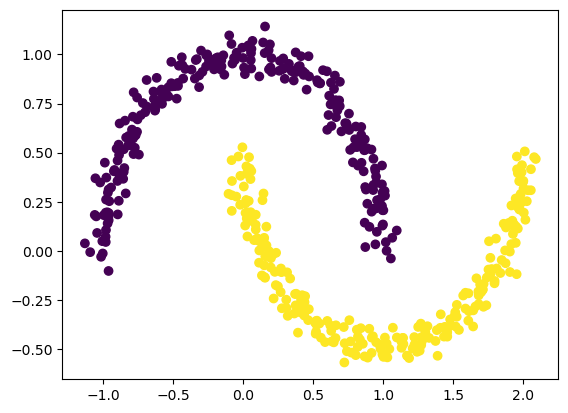

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y)

In [19]:
# Import the alternative algorithms for clustering.
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
# Use the Kmeans algorithm.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels_kmeans = kmeans.predict(X)


/Users/jbisal/anaconda3/envs/edX/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Fit and Predict Birch and Agglomerative models

In [20]:
# Use the Birch algorithm.

birch = Birch(n_clusters=2)
birch.fit(X)
labels_birch = birch.predict(X)

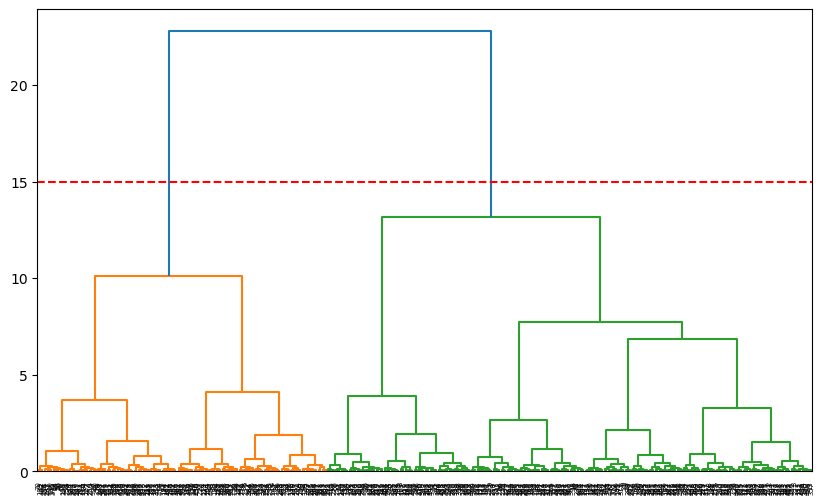

In [29]:
# Use the AgglomerativeClustering algorithm.
agg = AgglomerativeClustering()
agg.fit(X)
labels_agg = agg.labels_
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(X, 'ward')
plt.figure(figsize=(10, 6))
dendrogram(z)
plt.axhline(y=15, color='r', linestyle='--')  # Adjust y value to your preference
plt.show()


### Plot Model Predictions for Birch

In [31]:
df= pd.DataFrame()
df['0'] = X[:,0]
df['1'] = X[:,1]
df['birch'] = labels_birch
df.head()

,0,1,birch
0,0.269903,-0.089616,0
1,0.659609,-0.444019,0
2,0.850500,0.562703,0
3,0.609507,0.691347,0
4,2.003530,0.194464,0


In [33]:
df.hvplot.scatter(x='0', y='1', by='birch')

:NdOverlay   [birch]
   :Scatter   [0]   (1)

In [41]:
# Use the Birch algorithm.

birch3 = Birch(n_clusters=3)
birch3.fit(X)
labels_birch3 = birch3.predict(X)
df2= pd.DataFrame()
df2['0'] = X[:,0]
df2['1'] = X[:,1]
df2['birch'] = labels_birch3

df2.hvplot.scatter(x='0', y='1', by='birch')

:NdOverlay   [birch]
   :Scatter   [0]   (1)

In [6]:
# Make predictions for the Birch algorithm. 



,0,1,birch-labels
0,0.269903,-0.089616,0
1,0.659609,-0.444019,0
2,0.850500,0.562703,0
3,0.609507,0.691347,0
4,2.003530,0.194464,0
...,...,...,...
495,0.024589,0.392571,1
496,0.673013,0.715418,0
497,1.277861,-0.457502,0
498,-0.980544,0.194562,1


In [7]:
#  Rename the non-string columns 0 and 1, "No" and "Yes" to avoid the Holoviews warning for future versions. 



,feature_0,feature_1,birch-labels
0,0.269903,-0.089616,0
1,0.659609,-0.444019,0
2,0.850500,0.562703,0
3,0.609507,0.691347,0
4,2.003530,0.194464,0
...,...,...,...
495,0.024589,0.392571,1
496,0.673013,0.715418,0
497,1.277861,-0.457502,0
498,-0.980544,0.194562,1


In [8]:
# Plot predictions for the Birch algorithm. 



:NdOverlay   [birch-labels]
   :Scatter   [feature_0]   (feature_1)

### Estimate Scores for two Versions of the Birch Model

0

In [10]:
# Estimate scores for 3 clusters for the Birch model. 



In [42]:
from sklearn import metrics

score = metrics.calinski_harabasz_score(X, labels_birch)  
score

588.1123857523019

In [11]:
# Use the Calinski-Harabasz index or variance ratio criterion to define two clusters. 


588.1123857523019

In [43]:
from sklearn import metrics

score = metrics.calinski_harabasz_score(X, labels_birch3)  
score

654.2904571777167

In [12]:
# Use the Calinski-Harabasz index or variance ratio criterion to define three clusters. 



654.2904571777168